# Imports

In [1]:
from run_single import run_single, graph_types
from visualization import time_histograms

# Variables

# Time histograms

In [3]:
prefix = ''
results_dir = 'results/histograms/'

#type = 'line'

job_array_nb = 2

N = 100
M = 50
s = 0.001

nb_trajectories = 1000000 #1M runs

migration_rate = 0.001
nb_demes = 3

alpha = 1
initial_node = 1




In [3]:
for type in graph_types:
    run_single(prefix, results_dir, type, job_array_nb, N,M,s, nb_trajectories, migration_rate, nb_demes, alpha, initial_node)

Execution time: 11.509541988372803
Execution time: 6.115779161453247
Execution time: 6.129831314086914
Execution time: 6.827622175216675


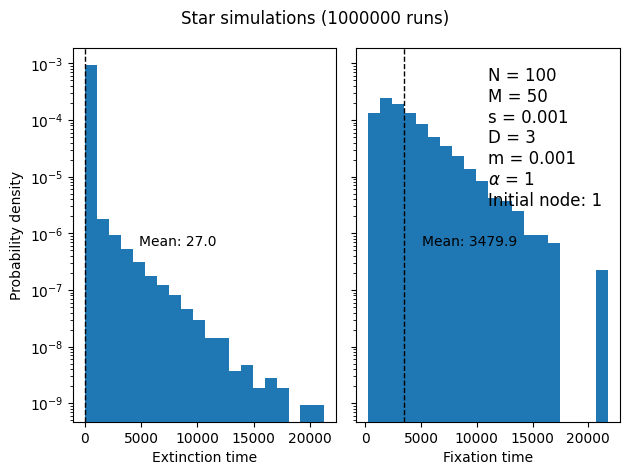

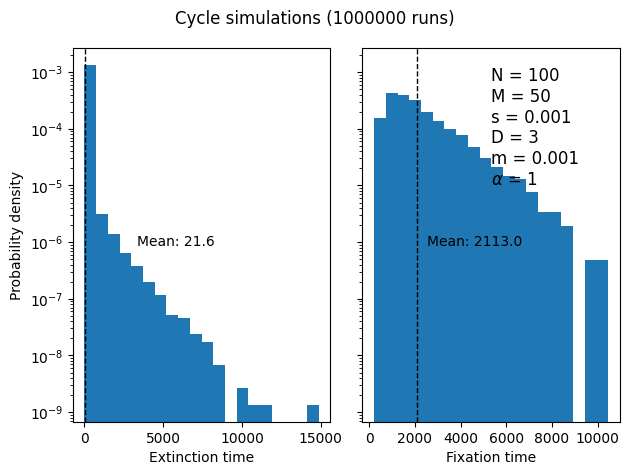

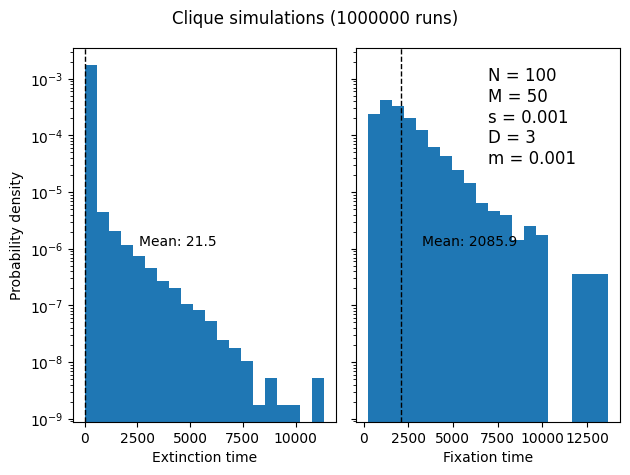

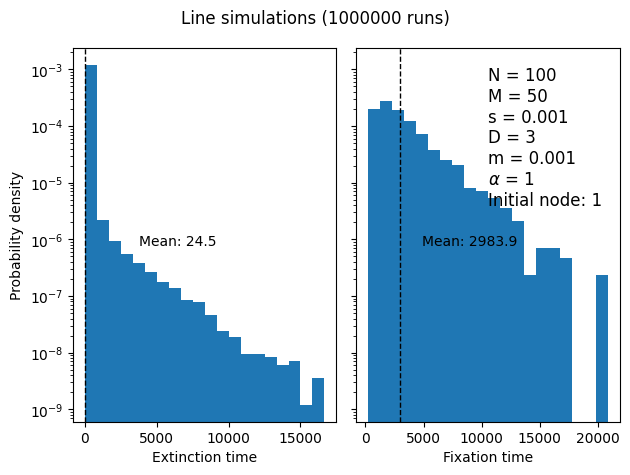

In [4]:
for type in graph_types:
    time_histograms(results_dir, prefix, type, job_array_nb)

In [4]:
N_wm = N * nb_demes
M_wm = M * nb_demes



In [6]:
run_single(prefix, results_dir, 'wm_sim', job_array_nb, N_wm,M_wm,s, nb_trajectories, migration_rate)

Execution time: 4.49567174911499


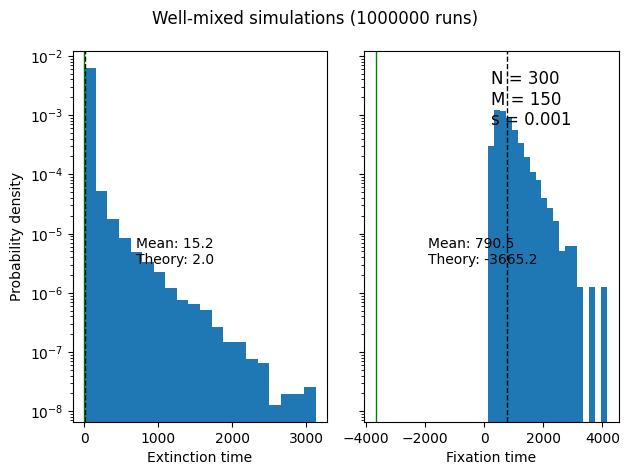

In [5]:
time_histograms(results_dir, prefix, 'wm_sim', job_array_nb)

# Comparing structures